# Library Import

In [1]:
import numpy, pandas, matplotlib.pyplot as mpbt    # importing libraties numpy, pandas and matplotlib
import matplotlib    # importing matplotlib
matplotlib.rcParams['axes.labelsize'] = 18    # customizing matplotlib axes
matplotlib.rcParams['xtick.labelsize'] = 15    # customizing matplotlib xtick
matplotlib.rcParams['ytick.labelsize'] = 15    # customizing matplotlib ytick
import seaborn as sns    # seaborn library

# Function to Read Data and Return 2 Dataframes

In [2]:
# Selecetd countries
contr_sel=[
    "Afghanistan", 
    "United Arab Emirates", 
    "Argentina", 
    "India", 
    "Bangladesh",
    "United Kingdom",
    "Germany"
]
# selecetd indicators
sel_ind=[
    "Electric power consumption (kWh per capita)",
    "CO2 emissions (kt)"
]

In [3]:
def encfets(epc):   # function to preaore data compatible to correlation
    epccols=epc.columns    # take column names from data
    epcidx=epc.index    # take index from data
    epcarr=numpy.array(epc.values,float)   # convert data to array
    epc=pandas.DataFrame(epcarr,columns=epccols,index=epcidx)    # preapre dataframe for correlation
    return epc    # return data

In [4]:
def datasetting(epc):    # function to prepare data
    epc=epc[(epc['Indicator Name']==sel_ind[0])|((epc['Indicator Name']==sel_ind[1]))]  # subset data with indicators taken
    fltr=epc['Country Name'].isin(contr_sel)     # get filter condition (features) by checking countries in the data
    epc=epc[fltr]     # prepare data with seleectd countries and indiucators
    cntr=epc['Country Name'].tolist()        # take Country Name to a list
    indx=epc['Indicator Name'].tolist()      # take Indicator Name to a list
    d1=[]  
    for i in range(len(indx)):
        d1.append(cntr[i]+"-"+indx[i])    # prepare data
    epc.insert(4,"Country with Indicator",d1)
    return epc  # return data

In [5]:
def data_reading(fl):    # fucntion to read data
    epcfrmd=pandas.read_csv(fl,engine='python',skiprows=3)   # read data 
    epcfrmd=epcfrmd.fillna(epcfrmd.mean())     # clenaing missing values by mean
    yrcols=epcfrmd.columns.tolist()[4:-1]     # take years from data
    epcfrmd=datasetting(epcfrmd)      # call fucntion to format data
    epcfrmd1=epcfrmd.T.iloc[4:][:-1]    # tranaspose dataframe
    # remove selecetd columns
    epcfrmd=epcfrmd.reset_index(drop=True).drop(['Unnamed: 65','Country Code','Indicator Code','Country with Indicator'],axis=1)
    epcfrmd1.columns=epcfrmd1.iloc[0]    # set row 0 as the column names
    epcfrmd1=epcfrmd1.iloc[1:]    # set data from 1 st row
    epcfrmd1['Year']=yrcols     # set years in data
    epcfrmd1=epcfrmd1.set_index("Year")
    return epcfrmd,epcfrmd1     # resturn data

In [6]:
EPC,EPC1=data_reading("Electric_Power_CO2_Word_Bank.csv")

In [7]:
EPC.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,CO2 emissions (kt),4.143710e+02,4.913780e+02,6.893960e+02,7.077310e+02,8.397430e+02,1.008425e+03,1.092766e+03,1.283450e+03,...,1.226000e+04,1.045000e+04,8.510000e+03,7.810000e+03,7.990000e+03,7.390000e+03,7.380000e+03,7.440000e+03,3.435867e+07,4.320922e+07
1,Afghanistan,Electric power consumption (kWh per capita),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,6.309450e+08,7.156517e+08,9.744211e+08,1.110238e+09,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
2,United Arab Emirates,CO2 emissions (kt),1.100100e+01,1.100100e+01,1.833500e+01,2.200200e+01,1.833500e+01,2.200200e+01,2.566900e+01,9.167500e+02,...,1.663200e+05,1.757300e+05,1.841000e+05,1.838400e+05,1.940400e+05,1.994600e+05,2.082500e+05,2.003000e+05,3.435867e+07,4.320922e+07
3,United Arab Emirates,Electric power consumption (kWh per capita),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,1.028706e+04,1.041601e+04,1.072450e+04,1.108834e+04,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
4,Argentina,CO2 emissions (kt),4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,...,1.772600e+05,1.785300e+05,1.840000e+05,1.799100e+05,1.860900e+05,1.842800e+05,1.801200e+05,1.774100e+05,3.435867e+07,4.320922e+07


In [8]:
EPC1.head()   # second data with country column

Country with Indicator,Afghanistan-CO2 emissions (kt),Afghanistan-Electric power consumption (kWh per capita),United Arab Emirates-CO2 emissions (kt),United Arab Emirates-Electric power consumption (kWh per capita),Argentina-CO2 emissions (kt),Argentina-Electric power consumption (kWh per capita),Bangladesh-CO2 emissions (kt),Bangladesh-Electric power consumption (kWh per capita),Germany-CO2 emissions (kt),Germany-Electric power consumption (kWh per capita),United Kingdom-CO2 emissions (kt),United Kingdom-Electric power consumption (kWh per capita),India-CO2 emissions (kt),India-Electric power consumption (kWh per capita)
Year,,,,,,,,,,,,,,
1960,414.371,20159401.163406,11.001,20159401.163406,48815.104,20159401.163406,14154.62,20159401.163406,20159401.163406,1586.749415,584299.78,2412.137405,120581.961,20159401.163406
1961,491.378,14768896.898304,11.001,14768896.898304,51180.319,14768896.898304,14656.999,14768896.898304,14768896.898304,1683.414913,588938.535,2553.693182,130402.187,14768896.898304
1962,689.396,14888963.885678,18.335,14888963.885678,53695.881,14888963.885678,16105.464,14888963.885678,14888963.885678,1790.686877,593360.937,2780.657277,143467.708,14888963.885678
1963,707.731,16420743.87221,22.002,16420743.87221,50083.886,16420743.87221,18514.683,16420743.87221,16420743.87221,1916.927528,603822.888,3002.087605,154083.673,16420743.87221
1964,839.743,16886643.335033,18.335,16886643.335033,55727.399,16886643.335033,19035.397,16886643.335033,16886643.335033,2060.547354,608355.3,3127.462963,150647.694,16886643.335033


In [9]:
EPC1.describe()

Country with Indicator,Afghanistan-CO2 emissions (kt),Afghanistan-Electric power consumption (kWh per capita),United Arab Emirates-CO2 emissions (kt),United Arab Emirates-Electric power consumption (kWh per capita),Argentina-CO2 emissions (kt),Argentina-Electric power consumption (kWh per capita),Bangladesh-CO2 emissions (kt),Bangladesh-Electric power consumption (kWh per capita),Germany-CO2 emissions (kt),Germany-Electric power consumption (kWh per capita),United Kingdom-CO2 emissions (kt),United Kingdom-Electric power consumption (kWh per capita),India-CO2 emissions (kt),India-Electric power consumption (kWh per capita)
count,61.0,6.100000e+01,61.000,6.100000e+01,61.0,6.100000e+01,61.0,6.100000e+01,6.100000e+01,6.100000e+01,61.000,61.000000,61.0,6.100000e+01
unique,60.0,6.100000e+01,58.000,6.100000e+01,60.0,6.100000e+01,61.0,6.100000e+01,6.100000e+01,6.100000e+01,61.000,61.000000,61.0,6.100000e+01
top,1100.0,1.476890e+07,11.001,1.476890e+07,113810.0,1.476890e+07,11520.0,1.476890e+07,1.476890e+07,4.320922e+07,598912.775,4480.335413,2301440.0,1.476890e+07
freq,2.0,1.000000e+00,2.000,1.000000e+00,2.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000,1.000000,1.0,1.000000e+00


# Data Analysis

In [10]:
conep_avg,co2ems_avg,conep_median,co2ems_median=[],[],[],[]   # empty list to store average and median values for Electric power consumption, CO2 emissions 
print("..........................................................")
for i in range(len(contr_sel)):
    EPCt=EPC[EPC['Country Name']==contr_sel[i]]    # filter by countries
    EPCt=EPCt.drop('Indicator Name',axis=1)      # remove Indicator Name
    print("               {} Statistics".format(contr_sel[i]))
    print("..........................................................")
    print("Average Consumption of Electric Power: {}".format(round(EPCt.iloc[0,1:].mean(),2)))   # show Average value for Electric Power
    print("Maximum Consumption of Electric Power: {}".format(round(EPCt.iloc[0,1:].median(),2)))   # show Maximum value for Electric Power
    print("Average Emission of CO2: {}".format(round(EPCt.iloc[1,1:].mean(),2)))   # show Average value for CO2
    print("Maximum Emission of CO2: {}".format(round(EPCt.iloc[1,1:].median(),2)))   # show Maximum value for CO2
    print("..........................................................")
    conep_avg.append(round(EPCt.iloc[0,1:].mean(),2))   # store data for Electric Power(Average) in lits
    co2ems_avg.append(round(EPCt.iloc[1,1:].mean(),2))   # store data for Electric Power(Maximum) in lits
    conep_median.append(round(EPCt.iloc[0,1:].median(),2))   # store data for CO2(Average) in lits
    co2ems_median.append(round(EPCt.iloc[1,1:].median(),2))   # store data for CO2(Maximum) in lits
# preapare data
EPC_stts=pandas.DataFrame({
    "Country":contr_sel,
    "Average Electric power consumption":conep_avg,
    "Average CO2 emissions":co2ems_avg,
    "Median Electric power consumption":conep_median,
    "Median CO2 emissions":co2ems_median,
})
EPC_stts=EPC_stts.sort_values(by="Country")
EPC_stts

..........................................................
               Afghanistan Statistics
..........................................................
Average Consumption of Electric Power: 1274382.61
Maximum Consumption of Electric Power: 1940.0
Average Emission of CO2: 164972883.91
Maximum Emission of CO2: 64627467.92
..........................................................
               United Arab Emirates Statistics
..........................................................
Average Consumption of Electric Power: 1342629.16
Maximum Consumption of Electric Power: 55400.0
Average Emission of CO2: 27983212.38
Maximum Emission of CO2: 10618.81
..........................................................
               Argentina Statistics
..........................................................
Average Consumption of Electric Power: 1384089.0
Maximum Consumption of Electric Power: 111030.0
Average Emission of CO2: 27978454.43
Maximum Emission of CO2: 2088.81
...................

,Country,Average Electric power consumption,Average CO2 emissions,Median Electric power consumption,Median CO2 emissions
0,Afghanistan,1274382.61,1.649729e+08,1940.00,64627467.92
2,Argentina,1384089.00,2.797845e+07,111030.00,2088.81
4,Bangladesh,1295496.72,2.797726e+07,19035.40,115.14
6,Germany,19841019.71,2.458782e+07,14888963.89,6445.87
3,India,2020501.73,2.797744e+07,579008.30,393.81
1,United Arab Emirates,1342629.16,2.798321e+07,55400.00,10618.81
5,United Kingdom,1802791.96,2.458728e+07,556690.00,5295.22


In [11]:
EPC_stts=EPC_stts.set_index("Country")

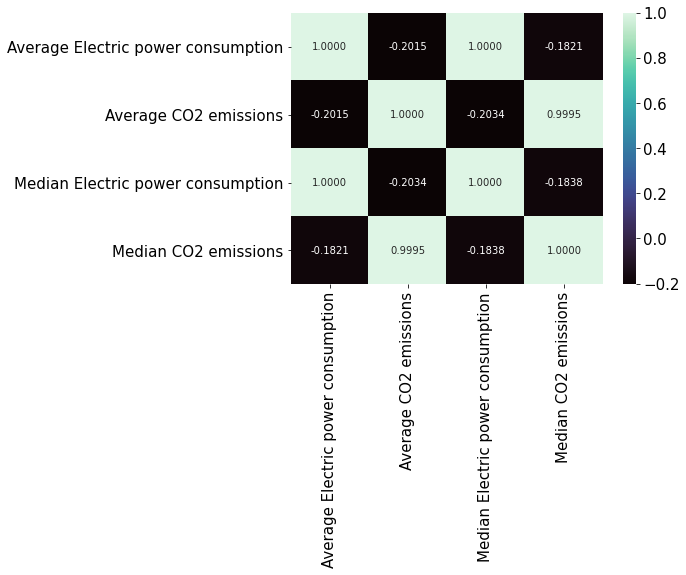

In [12]:
mpbt.figure(figsize=(7,5))
sns.heatmap(EPC_stts.corr(),annot=True,fmt="0.4f",cmap="mako")   # show correlation heatmap
mpbt.show()

In [13]:
def linevz(epc, ft, ttl):
    mpbt.figure(figsize=(10,6))    # setting figure dimension by 1000x600 pixel
    mpbt.plot(epc['{}'.format(ft)],"k--")    # plot data
    mpbt.bar(epc.index,epc['{}'.format(ft)],color=["c","b","m"],alpha=0.5)    # bar chart whih will connect data points in line chart
    mpbt.title("{}".format(ttl),fontsize=20,color="k")   # plotting title
    mpbt.xlabel("Country",fontsize=14,color="k")   # plotting x-label
    mpbt.xticks(rotation=90)   # rotate axis-x to 90 degrees
    mpbt.ylabel("{}".format(ft),fontsize=14,color="k")   # plotting  y-label
    mpbt.grid()   # grid 
    mpbt.show()   # Show plotting 

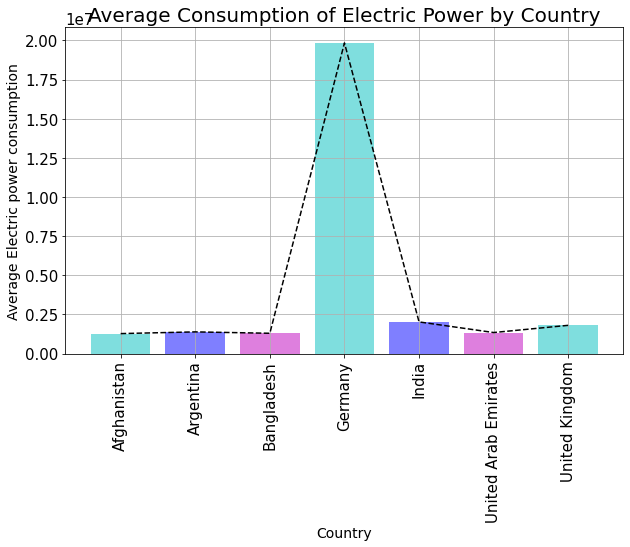

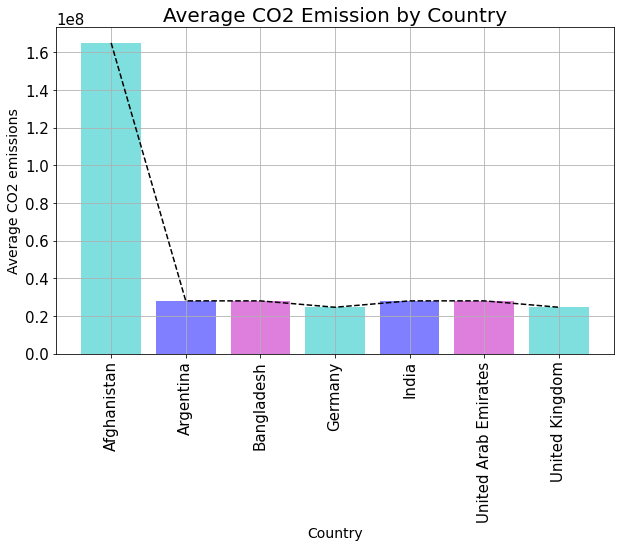

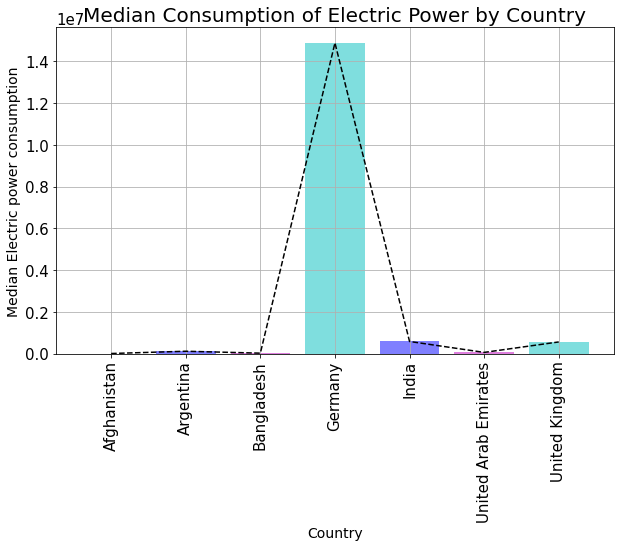

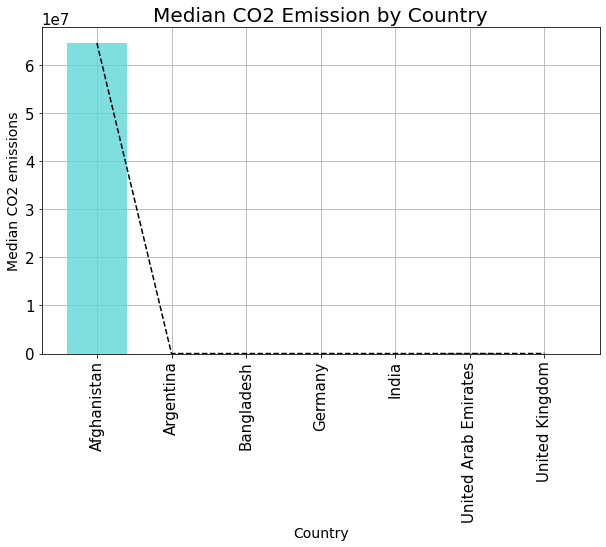

In [14]:
linevz(EPC_stts, "Average Electric power consumption", "Average Consumption of Electric Power by Country")
linevz(EPC_stts, "Average CO2 emissions", "Average CO2 Emission by Country")
linevz(EPC_stts, "Median Electric power consumption", "Median Consumption of Electric Power by Country")
linevz(EPC_stts, "Median CO2 emissions", "Median CO2 Emission by Country")

In [15]:
EPC1

Country with Indicator,Afghanistan-CO2 emissions (kt),Afghanistan-Electric power consumption (kWh per capita),United Arab Emirates-CO2 emissions (kt),United Arab Emirates-Electric power consumption (kWh per capita),Argentina-CO2 emissions (kt),Argentina-Electric power consumption (kWh per capita),Bangladesh-CO2 emissions (kt),Bangladesh-Electric power consumption (kWh per capita),Germany-CO2 emissions (kt),Germany-Electric power consumption (kWh per capita),United Kingdom-CO2 emissions (kt),United Kingdom-Electric power consumption (kWh per capita),India-CO2 emissions (kt),India-Electric power consumption (kWh per capita)
Year,,,,,,,,,,,,,,
1960,414.371,20159401.163406,11.001,20159401.163406,48815.104,20159401.163406,14154.62,20159401.163406,20159401.163406,1586.749415,584299.78,2412.137405,120581.961,20159401.163406
1961,491.378,14768896.898304,11.001,14768896.898304,51180.319,14768896.898304,14656.999,14768896.898304,14768896.898304,1683.414913,588938.535,2553.693182,130402.187,14768896.898304
1962,689.396,14888963.885678,18.335,14888963.885678,53695.881,14888963.885678,16105.464,14888963.885678,14888963.885678,1790.686877,593360.937,2780.657277,143467.708,14888963.885678
1963,707.731,16420743.87221,22.002,16420743.87221,50083.886,16420743.87221,18514.683,16420743.87221,16420743.87221,1916.927528,603822.888,3002.087605,154083.673,16420743.87221
1964,839.743,16886643.335033,18.335,16886643.335033,55727.399,16886643.335033,19035.397,16886643.335033,16886643.335033,2060.547354,608355.3,3127.462963,150647.694,16886643.335033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,7390.0,13524243.463002,199460.0,13524243.463002,184280.0,13524243.463002,73740.0,13524243.463002,747150.0,13524243.463002,378890.0,13524243.463002,2183280.0,13524243.463002
2017,7380.0,15538894.5931,208250.0,15538894.5931,180120.0,15538894.5931,78710.0,15538894.5931,732200.0,15538894.5931,366380.0,15538894.5931,2301440.0,15538894.5931
2018,7440.0,17094433.896123,200300.0,17094433.896123,177410.0,17094433.896123,82760.0,17094433.896123,709540.0,17094433.896123,358800.0,17094433.896123,2434520.0,17094433.896123


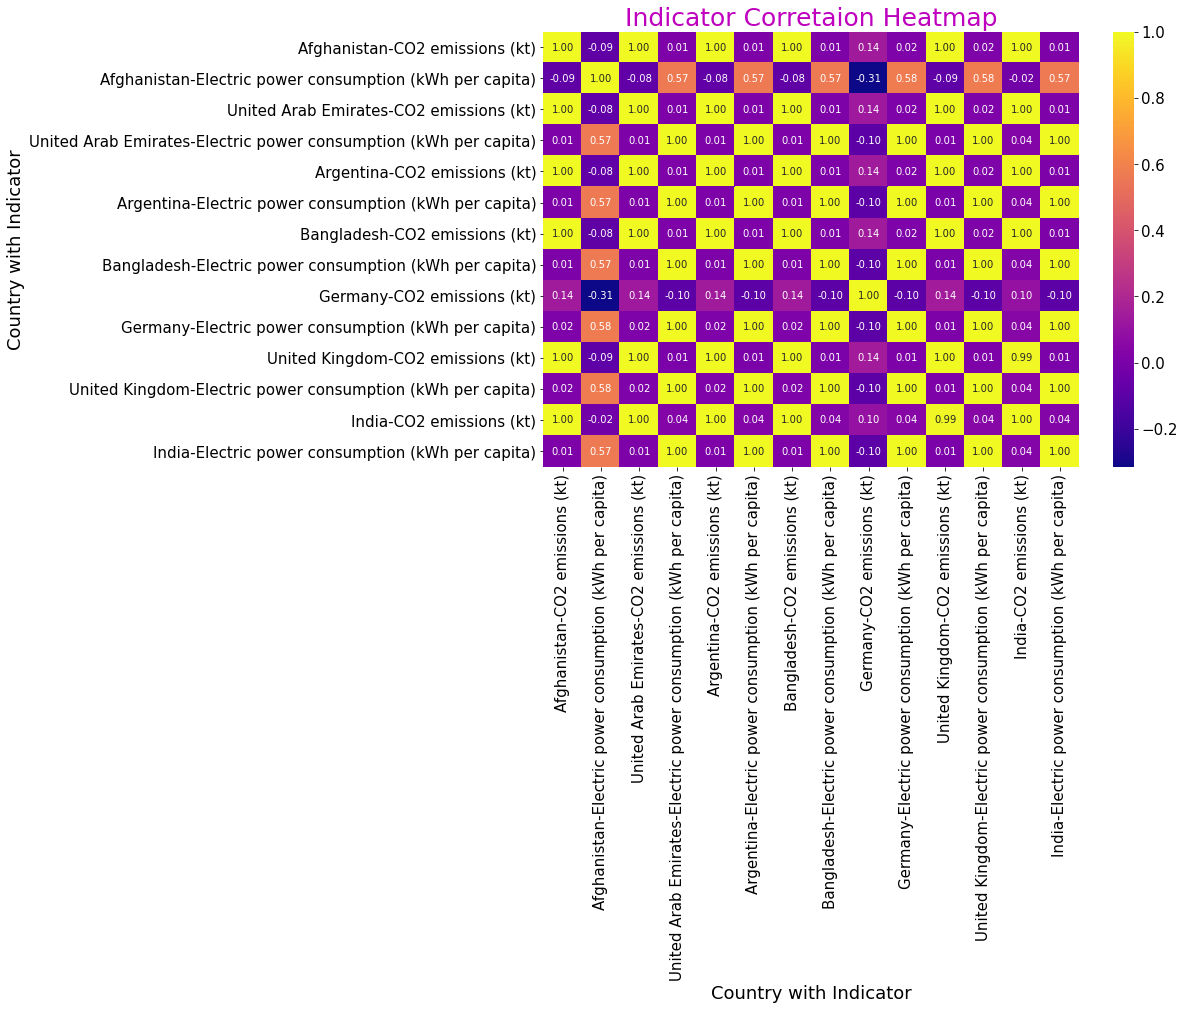

In [17]:
EPC1=encfets(EPC1)   # encode data by calling fucntion
mpbt.figure(figsize=(12,8))
mpbt.title("Indicator Corretaion Heatmap",fontsize=25,color="m")
sns.heatmap(EPC1.corr(),annot=True,fmt="0.2f",cmap="plasma")    # complete correlation chart
mpbt.show()